# Evaluation of Performance

In [7]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import my_parser
import my_classifier

In [ ]:
data = my_parser.get_all()

In [12]:
predictions, reasons, explanations = my_classifier.model(data, explain=True)

In [10]:
# Evaluate
labels = [my_classifier.label_map[item['label']['label']] for item in data]

print("📊 Classification Report:\n")
print(classification_report(labels, predictions, target_names=["Reject", "Accept"]))

print("🧮 Confusion Matrix:")
cm = confusion_matrix(y_true=labels, y_pred=predictions)
print(cm)

print("\n❌ False Positive Indices (predicted Accept, true Reject):")
false_positives = [i for i, (t, p) in enumerate(zip(labels, predictions)) if t == 0 and p == 1]
print(false_positives)

📊 Classification Report:

              precision    recall  f1-score   support

      Reject       1.00      0.50      0.67      4992
      Accept       0.67      1.00      0.80      5008

    accuracy                           0.75     10000
   macro avg       0.83      0.75      0.73     10000
weighted avg       0.83      0.75      0.73     10000

🧮 Confusion Matrix:
[[2506 2486]
 [   0 5008]]

❌ False Positive Indices (predicted Accept, true Reject):
[4, 5, 6, 9, 10, 12, 14, 17, 18, 20, 21, 27, 31, 32, 38, 47, 48, 49, 53, 62, 71, 79, 80, 86, 89, 90, 92, 97, 100, 102, 104, 105, 106, 107, 109, 116, 118, 122, 123, 129, 135, 138, 142, 149, 151, 152, 153, 154, 156, 160, 161, 164, 181, 182, 183, 192, 196, 197, 201, 202, 207, 212, 217, 220, 222, 228, 236, 245, 246, 248, 249, 250, 251, 257, 262, 269, 271, 272, 275, 287, 288, 290, 293, 305, 306, 313, 314, 322, 324, 330, 332, 334, 337, 339, 348, 349, 350, 353, 354, 358, 369, 370, 372, 373, 374, 380, 385, 389, 391, 392, 406, 421, 424, 429, 43

# Explanations

In [11]:
my_classifier.explain(data)[50:60]

[(0,
  [<RejectionReason.CLIENT_PROFILE_COUNTRY_OF_DOMICILE_SHOULD_MATCH_ACCOUNT_FORM_COUNTRY_OF_DOMICILE: 18>],
  ['client_profile.country_of_domicile(Belgium) should match account_form.country_of_domicile(Belgium,France)']),
 (0,
  [<RejectionReason.PASSPORT_NATIONALITY_SHOULD_MATCH_CLIENT_PROFILE_NATIONALITY: 12>],
  ['passport.nationality(Spanish) should match client_profile.nationality(Finnish)']),
 (1, [], []),
 (1, [], []),
 (0,
  [<RejectionReason.CLIENT_PROFILE_CURRENCY_SHOULD_MATCH_ACCOUNT_FORM_CURRENCY: 24>],
  ['client_profile.currency(AUT) should match account_form.currency(EUR)']),
 (1, [], []),
 (0,
  [<RejectionReason.PASSPORT_ISSUE_DATE_SHOULD_MATCH_CLIENT_PROFILE_PASSPORT_ISSUE_DATE: 14>,
   <RejectionReason.PASSPORT_EXPIRY_DATE_SHOULD_MATCH_CLIENT_PROFILE_PASSPORT_EXPIRY_DATE: 16>],
  ['passport.passport_issue_date(1986-09-26) should match client_profile.passport_issue_date(2017-09-26)',
   'passport.passport_expiry_date(1996-09-25) should match client_profile.passpo

# Analyze Rules

In [17]:
# How many times did each rule fire?
N = len(data)
for rule in my_classifier.RejectionReason:
    firings = len([1 for rules in reasons if rule in rules])
    print(f"""Rule {rule.value}: {rule.name}\n    fired {firings} times, {firings/N*100:.2f}% of the time""")

Rule 1: PASSPORT_FIRST_NAME_SHOULD_MATCH_ACCOUNT_FORM_FIRST_NAME
    fired 317 times, 3.17% of the time
Rule 2: PASSPORT_MIDDLE_NAME_SHOULD_MATCH_ACCOUNT_FORM_MIDDLE_NAME
    fired 118 times, 1.18% of the time
Rule 3: PASSPORT_LAST_NAME_SHOULD_MATCH_ACCOUNT_FORM_LAST_NAME
    fired 409 times, 4.09% of the time
Rule 4: PASSPORT_NUMBER_SHOULD_MATCH_ACCOUNT_FORM_PASSPORT_NUMBER
    fired 88 times, 0.88% of the time
Rule 5: PASSPORT_NUMBER_SHOULD_MATCH_CLIENT_PROFILE_PASSPORT_NUMBER
    fired 50 times, 0.50% of the time
Rule 7: PASSPORT_BIRTH_DATE_SHOULD_MATCH_CLIENT_PROFILE_BIRTH_DATE
    fired 266 times, 2.66% of the time
Rule 10: PASSPORT_GENDER_SHOULD_MATCH_CLIENT_PROFILE_GENDER
    fired 76 times, 0.76% of the time
Rule 12: PASSPORT_NATIONALITY_SHOULD_MATCH_CLIENT_PROFILE_NATIONALITY
    fired 205 times, 2.05% of the time
Rule 14: PASSPORT_ISSUE_DATE_SHOULD_MATCH_CLIENT_PROFILE_PASSPORT_ISSUE_DATE
    fired 203 times, 2.03% of the time
Rule 16: PASSPORT_EXPIRY_DATE_SHOULD_MATCH_CLIENT

In [18]:
# How many times was each rule decisive?
for rule in my_classifier.RejectionReason:
    decisive = len([1 for rules in reasons if (rule in rules and len(rules) == 1)])
    print(f"""Rule {rule.value}: {rule.name}\n    decisive {decisive} times, {decisive/N*100:.2f}% of the time""")

Rule 1: PASSPORT_FIRST_NAME_SHOULD_MATCH_ACCOUNT_FORM_FIRST_NAME
    decisive 71 times, 0.71% of the time
Rule 2: PASSPORT_MIDDLE_NAME_SHOULD_MATCH_ACCOUNT_FORM_MIDDLE_NAME
    decisive 8 times, 0.08% of the time
Rule 3: PASSPORT_LAST_NAME_SHOULD_MATCH_ACCOUNT_FORM_LAST_NAME
    decisive 223 times, 2.23% of the time
Rule 4: PASSPORT_NUMBER_SHOULD_MATCH_ACCOUNT_FORM_PASSPORT_NUMBER
    decisive 53 times, 0.53% of the time
Rule 5: PASSPORT_NUMBER_SHOULD_MATCH_CLIENT_PROFILE_PASSPORT_NUMBER
    decisive 32 times, 0.32% of the time
Rule 7: PASSPORT_BIRTH_DATE_SHOULD_MATCH_CLIENT_PROFILE_BIRTH_DATE
    decisive 159 times, 1.59% of the time
Rule 10: PASSPORT_GENDER_SHOULD_MATCH_CLIENT_PROFILE_GENDER
    decisive 45 times, 0.45% of the time
Rule 12: PASSPORT_NATIONALITY_SHOULD_MATCH_CLIENT_PROFILE_NATIONALITY
    decisive 131 times, 1.31% of the time
Rule 14: PASSPORT_ISSUE_DATE_SHOULD_MATCH_CLIENT_PROFILE_PASSPORT_ISSUE_DATE
    decisive 0 times, 0.00% of the time
Rule 16: PASSPORT_EXPIRY_DA

In [25]:
# Correlation between rules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from enum import Enum
from typing import List

def plot_enum_cooccurrence_matrix(enum_lists: List[List[Enum]], title: str = "Co-occurrence Matrix") -> None:
    if not enum_lists or not any(enum_lists):
        print("Empty input data.")
        return

    enum_members = list(my_classifier.RejectionReason)
    index_map = {reason: idx for idx, reason in enumerate(enum_members)}
    n = len(enum_members)
    matrix = np.zeros((n, n), dtype=int)

    # Count co-occurrences
    for sublist in enum_lists:
        for e1, e2 in combinations(sublist, 2):
            i, j = index_map[e1], index_map[e2]
            matrix[i, j] += 1
            matrix[j, i] += 1
        for e in sublist:
            i = index_map[e]
            matrix[i, i] += 1

    # Plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="YlGnBu",
                xticklabels=[e.value for e in enum_members],
                yticklabels=[e.value for e in enum_members])
    plt.title(title)
    plt.tight_layout()
    plt.show()

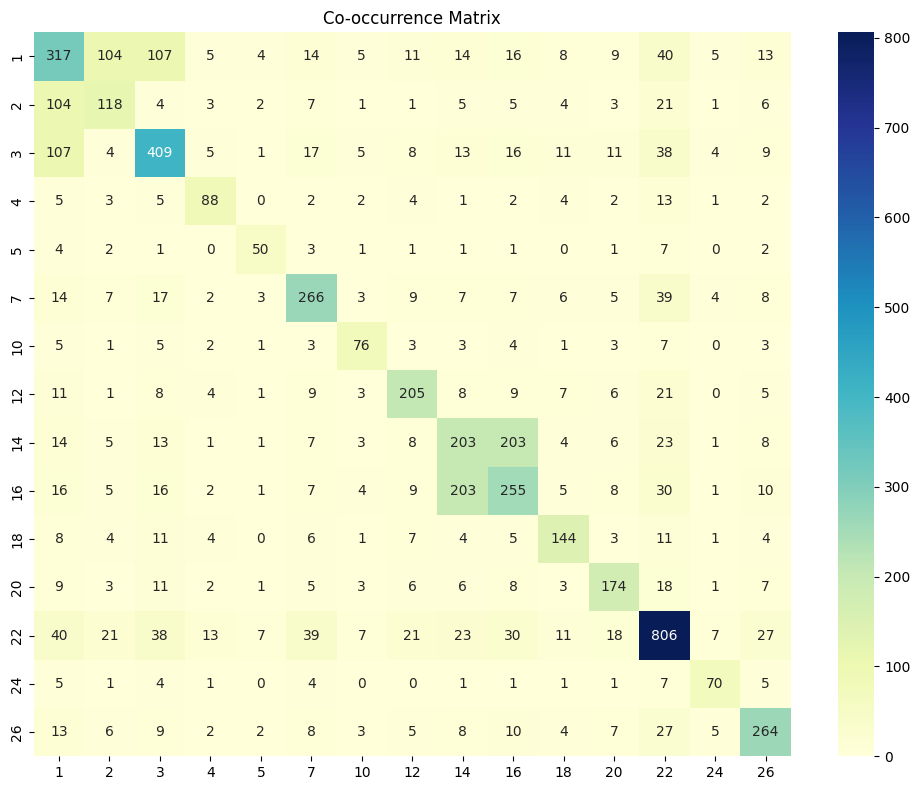

In [26]:
plot_enum_cooccurrence_matrix(reasons)

# Export to Solution.csv

In [4]:
my_parser.export(predictions, "Based_Bayes.csv")